# unity 1681 npz

In [1]:
import sys
from random import shuffle

sys.path.append("../../../")
%run ../../../ac/common/jsons.py
%run ../../../ac/visualizer/plotter.py
%run ../../../ac/common/images.py
%run ../../../ac/common/nps.py
%run ../../../ds/unity/model/item.py
%run ../../../ds/unity/model/eye_params.py
%run ../../../ds/unity/npz/packer.py
%run ../../../ds/unity/npz/gen.py
%run ../../../ac/langs/sequences.py

Using TensorFlow backend.


# resources

In [2]:
src_base_path = "/home/chy/archive-data/archived/이미지저장한"
out_dir_path = "/home/chy/archive-data/processed/unity-1681-npz"
npz_dir_path = "/home/chy/archive-data/processed/unity-class-npz"
shuffled_dir_path = "/home/chy/archive-data/processed/unity-class-shuffled-npz"

# npz-packer (from img)

In [3]:
# packer = UnityNPZPacker(out_dir_path, src_base_path)
# packer.pack()

# shuffler

In [4]:
# npz_paths = grep_files(npz_dir_path, "*.npz")
# num_npzs = len(npz_paths)
# print(num_npzs)
# npz_idx_list = list(range(num_npzs))
# shuffle(npz_idx_list)
# chunked_idx = chunks(npz_idx_list, 2)
# print(len(chunked_idx))
# print(len(flatten(chunked_idx)))

In [5]:
# block_size = 1000
# idx = 0
# for chunk in chunked_idx:
#     merged_npz = {}
    
#     print("*** current chunk {}".format(chunk))
#     for npz_idx in chunk:
#         npz_path = npz_paths[npz_idx]
#         npz = clone_npz(np.load(npz_path))
#         merged_npz = merge_npzs(merged_npz, npz)
    
#     merged_npz = shuffle_npz(merged_npz)
#     for i in range(0, count_item_in_npz(merged_npz), block_size):
#         print("*** current idx {}".format(idx))
#         imgs = merged_npz['images'][i:i+block_size]
#         metas = merged_npz['metas'][i:i+block_size]
#         if imgs.shape[0] != block_size:
#             continue
#         path = "{}/unity-{:05d}.npz".format(shuffled_dir_path, idx)
#         np.savez_compressed(path, metas=metas, images=imgs)
#         idx += 1

# file name shuffler

In [6]:
# npz_paths = grep_files("/home/chy/archive-data/processed/unity-class-shuffled-npz/", "*.npz")

In [7]:
# num_npz = len(npz_paths)
# print(num_npz)

In [8]:
# from random import shuffle
# randomize = list(range(num_npz))
# shuffle(randomize)
# shuffle(randomize)
# shuffle(randomize)

In [9]:
# "/home/chy/archive-data/processed/unity-class-shuffled-npz/unity-s{:05d}".format(10)

In [10]:
# for i, pi in enumerate(randomize):
#     src = npz_paths[pi]
#     dst = "/home/chy/archive-data/processed/unity-class-shuffled-npz/us-{:05d}.npz".format(i)
#     os.rename(src, dst)

# npz-labeler

In [11]:
# npz_paths = grep_files(out_dir_path, "*.npz")

In [12]:
# def relabel_npz(npz_path):
#     class_num = int(basename_in_path(npz_path)[6:11])
#     items = UnityItem.from_npz_path(npz_path)

#     for item in items:
#         item.image_shape = (720, 1280)
#         # iris, cars, ints points 보정
#         item.caruncles[:,1] = np.add(item.caruncles[:,1], 240)
#         item.interiors[:,1] = np.add(item.interiors[:,1], 240)
#         item.iris[:,1] = np.add(item.iris[:,1], 240)
#         eye_x, eye_y = class_num_to_eye_param(class_num)
#         item.set_eye_param(eye_x, eye_y)
    
#     UnityItem.to_npz(cn_dir_path, items, class_num)

In [13]:
# for npz_path in npz_paths:
#     relabel_npz(npz_path)

# find broken npz


- us-04241.npz
- us-06703.npz
- us-04323.npz
- us-05628.npz
- us-00498.npz
- us-01427.npz
- us-05277.npz
- us-05932.npz
- us-07752.npz
- us-05180.npz
- us-00030.npz
- us-00313.npz
- us-00934.npz
- us-07396.npz
- us-01668.npz


In [14]:
# npz_paths = grep_files("/home/chy/archive-data/processed/unity-class-shuffled-npz/", "*.npz")

In [15]:
# for npz_path in npz_paths[3214:]:
#     npz = np.load(npz_path)
#     images = npz['images']
#     for img in images:
#         if img == b'':
#             print("*** wrong [{}]***".format(npz_path))
#             continue
#     print("[{}] checked".format(npz_path))

# verify

In [3]:
sample_npz_path = "/home/chy/archive-data/processed/unity-class-shuffled-npz/us-00006.npz"
items = UnityItem.from_npz_path(sample_npz_path)

/home/chy/devs/chyenv/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


array([-0.3192,  0.4919, -0.81  ,  0.    ])

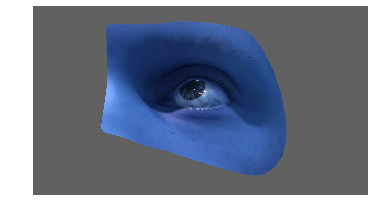

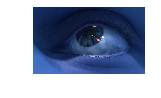

In [4]:
sample = items[10]
show_image(sample.get_decoded_frame(), fig_size=(6,6))
show_image(sample.get_cropped_eye_img(), fig_size=(2,2))
sample.look_vec

In [7]:
sample.iris.shape

(32, 3)

In [5]:
x = [(key, vars(sample)[key]) for key in sample.meta_keys]
sample.report()

UID.............................................8e41d46697e03c90f394bb1587fbc35e
IMAGE_SHAPE..........................................................(720, 1280)
EYE_PITCH.....................................................................18
EYE_YAW....................................................................-12.0
LOOK_VEC.......................................[-0.3192  0.4919 -0.81    0.    ]
HEAD_POSE...........................................[347.7606 172.3882   0.    ]
